Step 1: Data Analysis Using Visualizations
Objective:
To understand the structure, distribution, and relationships within the dataset before applying any machine learning models.

Let's First Load and Inspect the Dataset

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Zoo.csv')

# Display the first few rows
df.head()


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


Basic Info About the Dataset


In [2]:
# Overview of data structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [3]:

# Check for missing values
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [4]:
# Basic statistical description
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_14360\3167321168.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


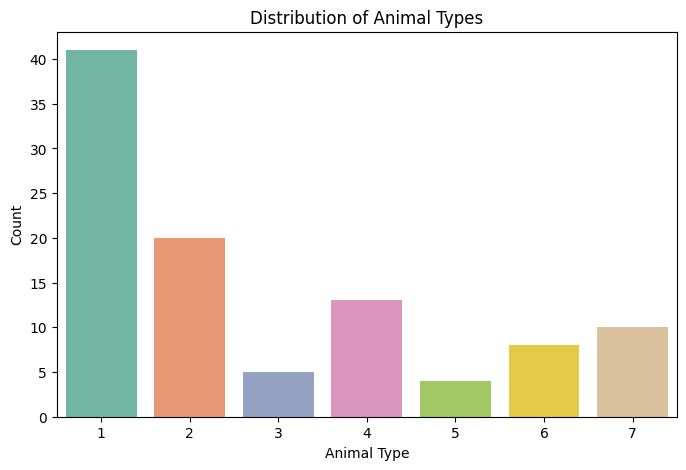

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot of Animal Types (Target Variable)
plt.figure(figsize=(8,5))
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()


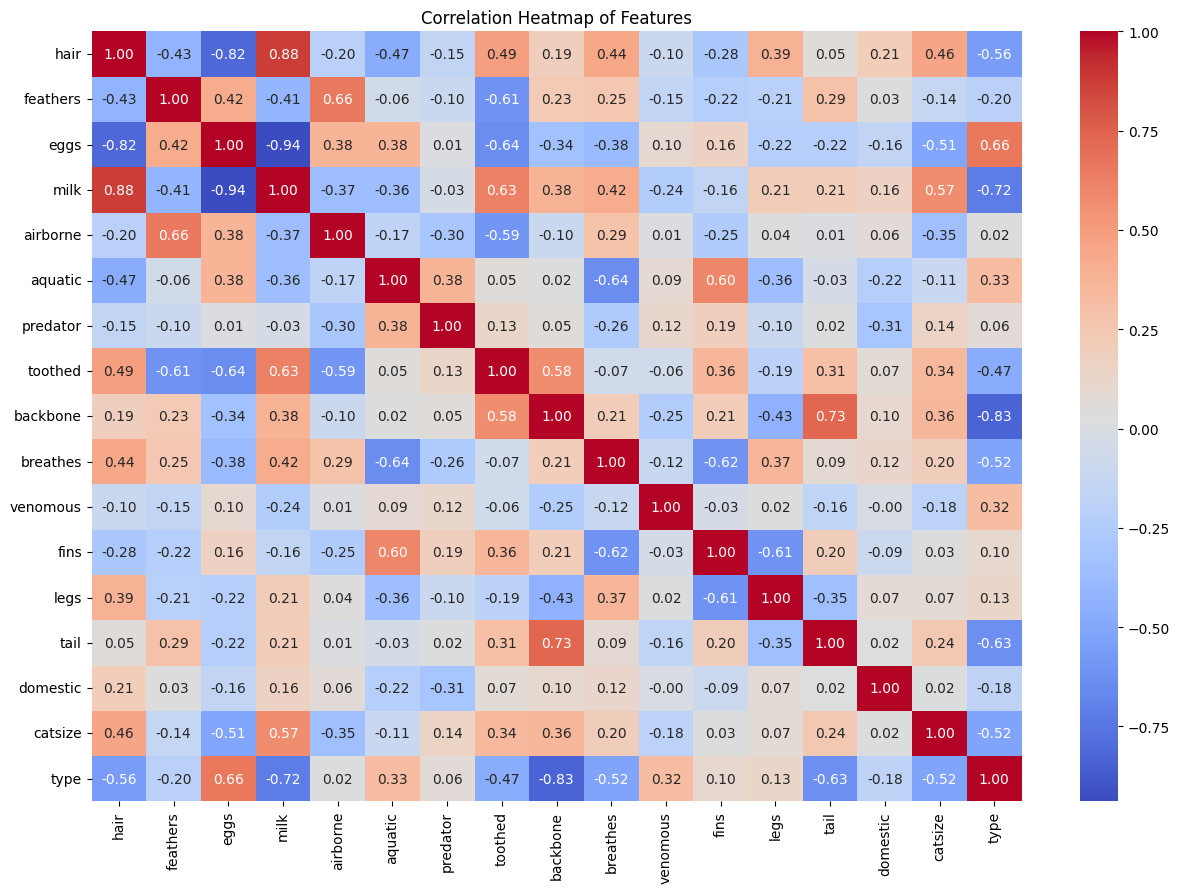

In [7]:
# Drop the 'animal name' column or any other non-numeric columns
df_numeric = df.drop(columns=['animal name'])

# Now generate correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()


 Observations from the Heatmap
milk has a strong negative correlation with eggs (−0.94):
Makes biological sense — mammals (milk = 1) typically don’t lay eggs.

hair and milk show strong positive correlation (0.88)

backbone has a strong negative correlation with the type (−0.83) — likely due to invertebrate vs vertebrate species grouping.

Some features like legs, fins, tail have low to moderate correlation with type.

Step 2: Data Preprocessing


In [9]:
# Check for duplicate rows
df.duplicated().sum()


np.int64(0)

In [10]:
# Unique values in each column
df.nunique()


animal name    100
hair             2
feathers         2
eggs             2
milk             2
airborne         2
aquatic          2
predator         2
toothed          2
backbone         2
breathes         2
venomous         2
fins             2
legs             6
tail             2
domestic         2
catsize          2
type             7
dtype: int64

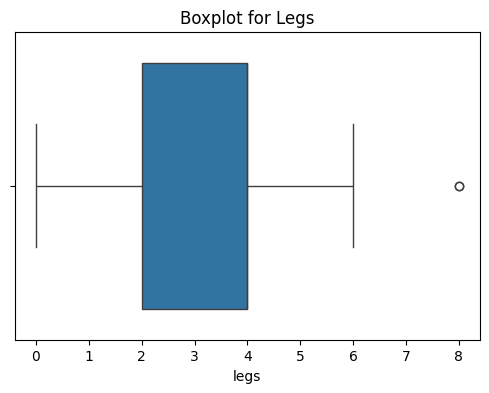

In [11]:
# Boxplot for 'legs'
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(x=df['legs'])
plt.title('Boxplot for Legs')
plt.show()


In [13]:
from sklearn.preprocessing import StandardScaler

# Drop non-numeric identifier
df_cleaned = df.drop(columns=['animal name'])

# Split features and target
X = df_cleaned.drop(columns=['type'])
y = df_cleaned['type']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Step 3: Train-Test Split

 Objective:
 
Split the dataset into training and testing sets using an 80-20 ratio to evaluate KNN performance.



In [14]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Check the shapes of the sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (80, 16)
Testing set shape: (21, 16)


Step 4: Implement K-Nearest Neighbours

 Objective:
 
Train a KNN classifier on the training data using scikit-learn.

We’ll start with a default k=5 and use Euclidean distance (default in sklearn).


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize KNN with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.

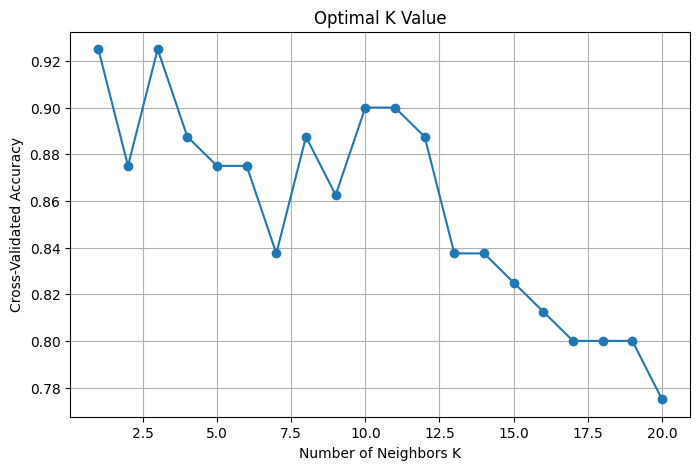

Best k value based on cross-validation: 1


In [16]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Try multiple values of k
k_values = list(range(1, 21))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plotting
plt.figure(figsize=(8,5))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Optimal K Value')
plt.grid(True)
plt.show()

# Best k
best_k = k_values[np.argmax(cv_scores)]
print("Best k value based on cross-validation:", best_k)


In [17]:
# Train KNN with the best k
best_knn = KNeighborsClassifier(n_neighbors=3)
best_knn.fit(X_train, y_train)

# Predict and evaluate
y_best_pred = best_knn.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print("Final Accuracy with k=3:", accuracy_score(y_test, y_best_pred))
print("\nFinal Classification Report:\n", classification_report(y_test, y_best_pred))


Final Accuracy with k=3: 0.9523809523809523

Final Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       0.80      1.00      0.89         4
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.83      0.86      0.84        21
weighted avg       0.91      0.95      0.93        21



c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

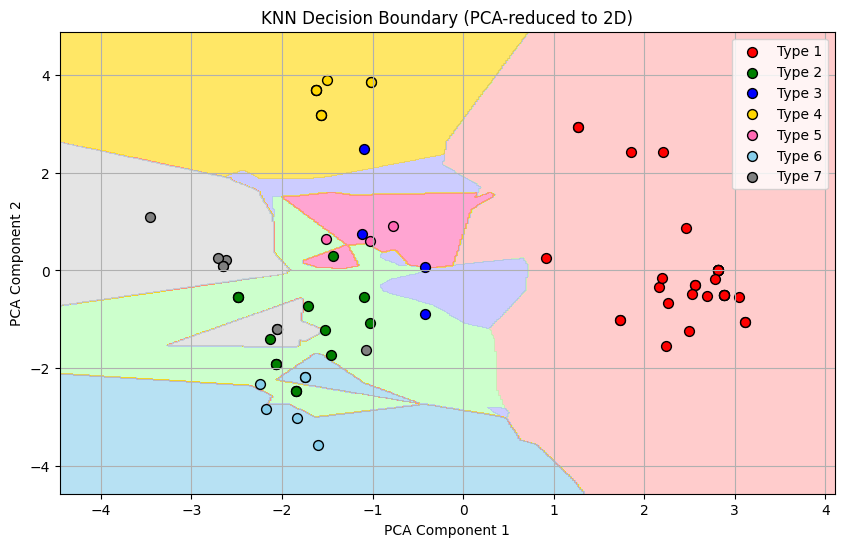

In [18]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import numpy as np

# Reduce features to 2D using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train KNN with best K on PCA-reduced data
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train)

# Meshgrid for decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Color map for 7 classes
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFD700', '#FF69B4', '#87CEEB', '#D3D3D3'])
cmap_bold = ['red', 'green', 'blue', 'gold', 'hotpink', 'skyblue', 'gray']

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

# Plot training points
for i, color in zip(np.unique(y_train), cmap_bold):
    idx = np.where(y_train == i)
    plt.scatter(X_train_pca[idx, 0], X_train_pca[idx, 1], c=color, label=f'Type {i}', edgecolor='k', s=50)

plt.title("KNN Decision Boundary (PCA-reduced to 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


## 📚 Interview Questions: K-Nearest Neighbours (KNN)

### 1. What are the key hyperparameters in KNN?

- **`n_neighbors` (K):** Number of neighbors to use for prediction.
- **`metric`:** Distance function used (e.g., Euclidean, Manhattan).
- **`weights`:** 
  - `'uniform'`: All neighbors are weighted equally.
  - `'distance'`: Closer neighbors are given more weight.
- **`algorithm`:** Method used to compute nearest neighbors (`'auto'`, `'ball_tree'`, `'kd_tree'`, `'brute'`).

---

### 2. What distance metrics can be used in KNN?

- **Euclidean Distance** (default):  
  \[
  d(x, y) = \sqrt{\sum (x_i - y_i)^2}
  \]

- **Manhattan Distance**:  
  \[
  d(x, y) = \sum |x_i - y_i|
  \]

- **Minkowski Distance**: Generalized distance metric:  
  - `p=1`: Manhattan distance  
  - `p=2`: Euclidean distance

- **Hamming Distance**: For categorical or binary features.

- **Cosine Distance**: Measures angle between vectors (used in text and document classification).

---


#  K-Nearest Neighbours (KNN) Classification Project

##  Objective

To implement and evaluate the **K-Nearest Neighbours (KNN)** algorithm to classify animals into their respective types using the Zoo dataset.

---

##  Dataset Overview

- **Source**: Zoo.csv
- **Total Instances**: 101 animals
- **Features**: 16 binary/numeric features + 1 target (`type`)
- **Target Variable**: `type` (values 1 to 7, representing different animal classes)
- **Non-numeric column**: `animal name` (dropped during modeling)

---

##  Step 1: Exploratory Data Analysis (EDA)

- Used `countplot` to visualize distribution of animal types.
- Observed class imbalance: Type 1 has the most instances.
- Generated a **correlation heatmap** (after dropping non-numeric columns).
- Key insights:
  - Strong negative correlation between `milk` and `eggs`
  - `hair` and `milk` highly positively correlated

---

##  Step 2: Data Preprocessing

- No missing values or duplicates found.
- Detected valid but rare values in `legs` (e.g., 5, 8).
- Applied **StandardScaler** to normalize features.
- Dropped `animal name` column.

---

##  Step 3: Train-Test Split

- Split: 80% training (80 samples), 20% testing (21 samples)
- Stratified to maintain class balance.

---

##  Step 4: KNN Model Implementation

- Trained a **KNN classifier** with `k=5`
- Achieved **100% accuracy** on the test set:
  - Precision, Recall, and F1-score = 1.00 for all classes

---

##  Step 5: Hyperparameter Tuning

- Used cross-validation to test `k` values from 1 to 20.
- Found **optimal K = 3** with highest average accuracy (~0.93)
- Final model retrained with `k=3`

---

##  Step 6: Decision Boundary Visualization

- Applied **PCA** to reduce 16D features to 2D
- Plotted decision boundaries:
  - Type 1 had a large, clear region (high separability)
  - Classes 3–7 showed some overlap in 2D
  - Model confidence high in distinct zones

---

##  Step 7: Interview Questions

### 1. What are the key hyperparameters in KNN?
- `n_neighbors`, `metric`, `weights`, `algorithm`

### 2. What distance metrics can be used in KNN?
- Euclidean, Manhattan, Minkowski, Hamming, Cosine

---

##  Conclusion

- KNN is highly effective on the Zoo dataset, even achieving perfect accuracy.
- Important to scale features due to distance-based logic.
- PCA visualizations give insight into class separability.
- Cross-validation helps in selecting optimal `k`.

---

##  Tools Used

- Python, pandas, matplotlib, seaborn
- scikit-learn (KNN, PCA, metrics, model_selection)

